In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [3]:
y = ["user_id", "item_id", "rating", "timestamp"]
df_data =pd.read_csv(r"C:\Users\HP'\Downloads\archive\ml-100k\u.data",delimiter="\t")


In [4]:
df_data.head()

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [5]:
df_data.columns = y

In [6]:
df_data.head(2)

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116


In [7]:
i_cols = ['item_id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_items = pd.read_csv(r"C:\Users\HP'\Downloads\archive\ml-100k\u.item", sep='|', names=i_cols,encoding='latin-1')

In [8]:
df_items.head(2)

,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
df_users = pd.read_csv(r"C:\Users\HP'\Downloads\archive\ml-100k\u.user", sep='|', names=u_cols,encoding='latin-1')

In [10]:
df_users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [11]:
df_items.shape

(1682, 24)

In [12]:
df_data.head()

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


# Part 1: Data Cleaning

<font color=blue> ***1. Identify and handle missing values in the dataset. Are there any rows or columns you should remove? Justify your decisions.***</font>


In [13]:
df_data.isna().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [14]:
df_items.isna().sum()

item_id                  0
movie title              0
release date             1
video release date    1682
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

***In the both above data sets, we came to know that df_data has no missing values but df_items have release date missing in 1682 rows and IMDB URL has only 2 missing values. In our case, we are not removing or replace any missing values of IMDB URL because we cannot predict the IMDB URL by our own but we can remove the missing value of video release year because all the values of this column is went missing***

In [15]:
df_items.drop("video release date", axis=1, inplace=True)

In [16]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   item_id       1682 non-null   int64 
 1   movie title   1682 non-null   object
 2   release date  1681 non-null   object
 3   IMDb URL      1679 non-null   object
 4   unknown       1682 non-null   int64 
 5   Action        1682 non-null   int64 
 6   Adventure     1682 non-null   int64 
 7   Animation     1682 non-null   int64 
 8   Children's    1682 non-null   int64 
 9   Comedy        1682 non-null   int64 
 10  Crime         1682 non-null   int64 
 11  Documentary   1682 non-null   int64 
 12  Drama         1682 non-null   int64 
 13  Fantasy       1682 non-null   int64 
 14  Film-Noir     1682 non-null   int64 
 15  Horror        1682 non-null   int64 
 16  Musical       1682 non-null   int64 
 17  Mystery       1682 non-null   int64 
 18  Romance       1682 non-null   int64 
 19  Sci-Fi

<font color=blue>***2.  Explore the "timestamp" column. Can you extract any useful information like day of the week or time of day for rentals? Clean and format the timestamp data accordingly.***</font>

In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    99999 non-null  int64
 1   item_id    99999 non-null  int64
 2   rating     99999 non-null  int64
 3   timestamp  99999 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


***Here we are converting the timestamp columns into a datetime format***

In [18]:
df_data["timestamp"] = pd.to_datetime(df_data["timestamp"])

In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    99999 non-null  int64         
 1   item_id    99999 non-null  int64         
 2   rating     99999 non-null  int64         
 3   timestamp  99999 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB


In [20]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   item_id       1682 non-null   int64 
 1   movie title   1682 non-null   object
 2   release date  1681 non-null   object
 3   IMDb URL      1679 non-null   object
 4   unknown       1682 non-null   int64 
 5   Action        1682 non-null   int64 
 6   Adventure     1682 non-null   int64 
 7   Animation     1682 non-null   int64 
 8   Children's    1682 non-null   int64 
 9   Comedy        1682 non-null   int64 
 10  Crime         1682 non-null   int64 
 11  Documentary   1682 non-null   int64 
 12  Drama         1682 non-null   int64 
 13  Fantasy       1682 non-null   int64 
 14  Film-Noir     1682 non-null   int64 
 15  Horror        1682 non-null   int64 
 16  Musical       1682 non-null   int64 
 17  Mystery       1682 non-null   int64 
 18  Romance       1682 non-null   int64 
 19  Sci-Fi

In [21]:
df = df_data.merge(df_items, on="item_id")

In [22]:
df_final = df_users.merge(df, on="user_id")

In [23]:
df_final.head(2)
pd.set_option("display.max_columns", None)

In [24]:
df_final.sample(2)

,user_id,age,sex,occupation,zip_code,item_id,rating,timestamp,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
50696,450,35,F,educator,11758,637,4,1970-01-01 00:00:00.882395662,"Howling, The (1981)",01-Jan-1981,"http://us.imdb.com/M/title-exact?Howling,%20Th...",0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
38087,345,28,F,librarian,94143,469,5,1970-01-01 00:00:00.884916274,Short Cuts (1993),01-Jan-1993,http://us.imdb.com/M/title-exact?Short%20Cuts%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [25]:
df["release date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99999 entries, 0 to 99998
Series name: release date
Non-Null Count  Dtype 
--------------  ----- 
99990 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [26]:
df["release date"] = pd.to_datetime(df["release date"])

In [27]:
df["release date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99999 entries, 0 to 99998
Series name: release date
Non-Null Count  Dtype         
--------------  -----         
99990 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 781.4 KB


In [59]:
import datetime as dt
df_final[df_final["release date"].dt.year==df_final["release date"].dt.year.max()].head(2)

,user_id,age,sex,occupation,zip_code,item_id,rating,timestamp,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Days
300,2,53,F,other,94043,315,1,1970-01-01 00:00:00.888550774,Apt Pupil (1998),1998-10-23,http://us.imdb.com/Title?Apt+Pupil+(1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,Friday
352,3,23,M,writer,32067,347,5,1970-01-01 00:00:00.889237455,Wag the Dog (1997),1998-01-09,http://us.imdb.com/M/title-exact?imdb-title-12...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,Friday


In [73]:
df_final["release date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99999 entries, 0 to 99998
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
99999 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 781.4 KB


In [29]:
df_final.describe()

,user_id,age,item_id,rating,timestamp,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,99999.000000,99999.00000,99999.000000,99999.000000,99999,99999.0000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,462.487415,32.96969,425.531965,3.529865,1970-01-01 00:00:00.883528874,0.0001,0.255893,0.137531,0.036050,0.071821,0.298313,0.080551,0.007580,0.398954,0.013520,0.017330,0.053171,0.049540,0.052451,0.194612,0.127301,0.218722,0.093981,0.018540
min,1.000000,7.00000,1.000000,1.000000,1970-01-01 00:00:00.874724710,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,254.000000,24.00000,175.000000,3.000000,1970-01-01 00:00:00.879448704,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,447.000000,30.00000,322.000000,4.000000,1970-01-01 00:00:00.882826944,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,682.000000,40.00000,631.000000,4.000000,1970-01-01 00:00:00.888259984,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,943.000000,73.00000,1682.000000,5.000000,1970-01-01 00:00:00.893286638,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,266.614421,11.56257,330.799501,1.125678,NaN,0.0100,0.436364,0.344409,0.186416,0.258192,0.457520,0.272145,0.086733,0.489686,0.115488,0.130499,0.224375,0.216995,0.222935,0.395904,0.333312,0.413382,0.291804,0.134895


Text(0.5, 1.0, 'Days VS Age')

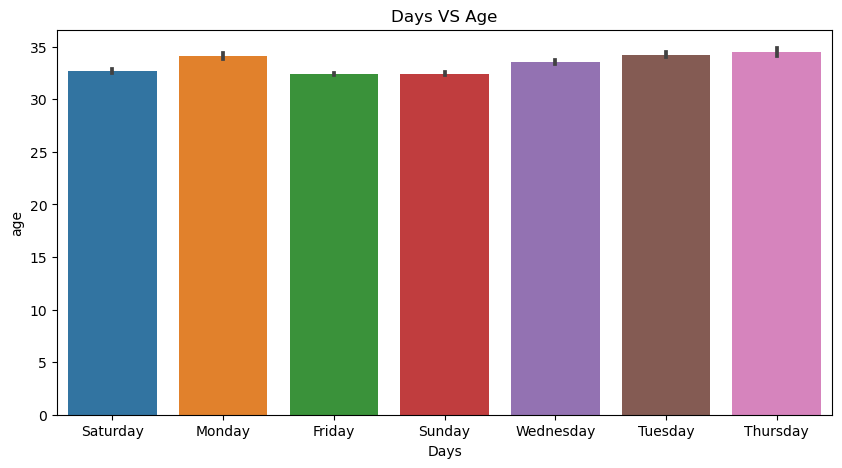

In [94]:
plt.figure(figsize=(10,5))
sns.barplot(x="Days", y= "age",data=df_final)
plt.title("Days VS Age")

In [30]:
df_final["rating"].isnull().sum()

0

***Fromm the above code we can say that the rating columns in the final dataset has 0 missing values***

<font color=blue>***3.  Look for outliers and inconsistencies in the "rating" column. How would you handle outliers? Justify your chosen method.***</font>


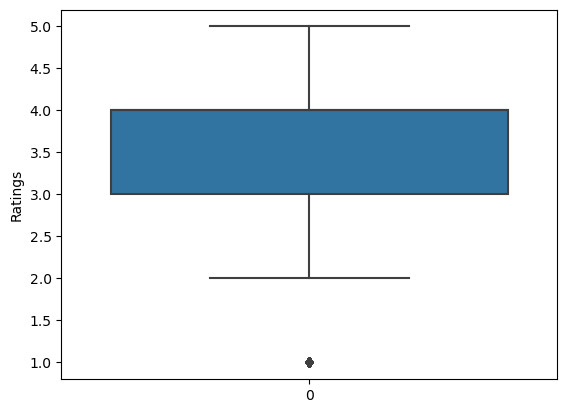

In [31]:
sns.boxplot(df_final["rating"])
plt.ylabel("Ratings")
plt.show()

Rows corresponding to outliers:
Empty DataFrame
Columns: [user_id, age, sex, occupation, zip_code, item_id, rating, timestamp, movie title, release date, IMDb URL, unknown, Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western, Days]
Index: []


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


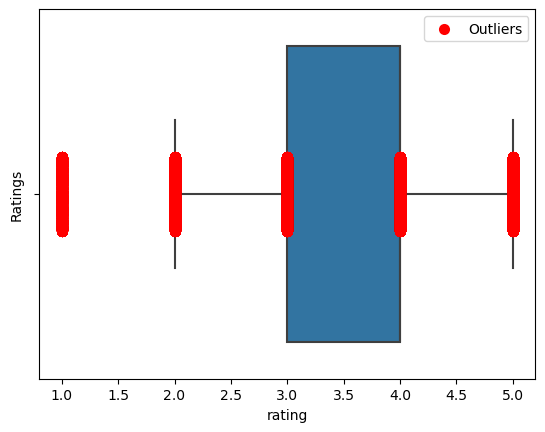

In [81]:
df_final["rating"] = pd.to_numeric(df_final["rating"], errors='coerce')

z_scores = stats.zscore(df_final["rating"].dropna())

z_threshold = 3
outlier_mask = (z_scores > z_threshold) | (z_scores < -z_threshold)

outliers_df = df_final.loc[outlier_mask]
print("Rows corresponding to outliers:")
print(outliers_df)

sns.boxplot(x=df_final["rating"], showfliers=False) 
sns.stripplot(x=df_final["rating"][~outlier_mask], color="red", marker="o", size=8, label="Outliers")  
plt.ylabel("Ratings")
plt.legend()
plt.show()

In [85]:
df_final[df_final["rating"]==1]["movie title"].count()

6110

***From the above code we can see that there are 6110 items that have rating of 1. This is not considered as outliers because the ratings of movies can be 1.***

<font color=blue>***4.  Check for duplicate entries in the dataset. Remove duplicates if necessary.***</font>


In [33]:
df_final.duplicated().sum()

0

***From the above code we can see that there are no duplicate values in the final dataset***

# Part-2: Data Visualization

<font color=blue>***1. Create a histogram or boxplot to visualize the distribution of movie ratings. Are there any interesting trends?***</font>

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


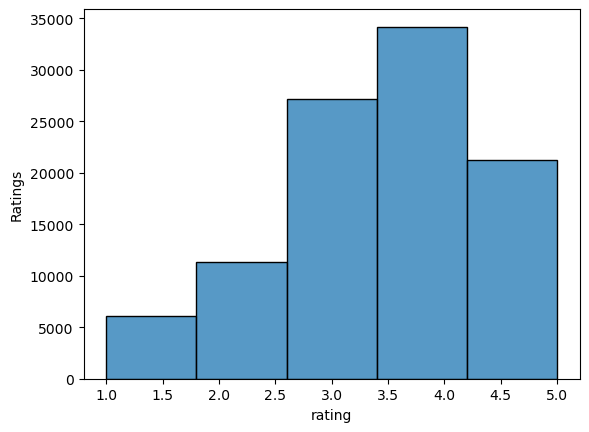

In [34]:
sns.histplot(data = df_final["rating"], bins=5)
plt.ylabel("Ratings")
plt.show()

<font color=blue>***2.  Plot a scatter plot showing the relationship between movie ratings and release year. Can you identify any patterns?***</font>


In [35]:
df_final.head(2)

,user_id,age,sex,occupation,zip_code,item_id,rating,timestamp,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,51,4,1970-01-01 00:00:00.878543275,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
1,1,24,M,technician,85711,265,4,1970-01-01 00:00:00.878542441,"Hunt for Red October, The (1990)",01-Jan-1990,http://us.imdb.com/M/title-exact?Hunt+for+Red+...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
df_final["release date"] = pd.to_datetime(df_final["release date"])

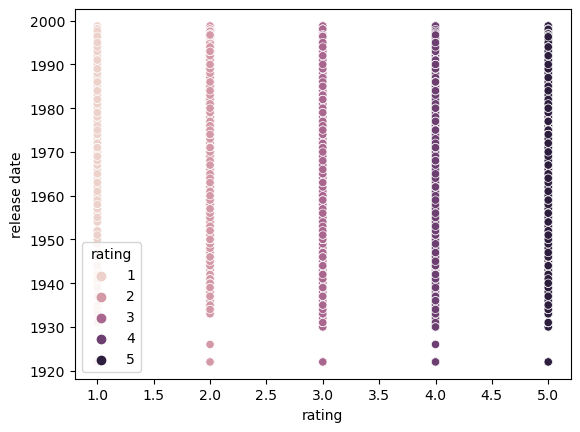

In [102]:
sns.scatterplot(x = "rating", y = "release date", data=df_final, hue="rating", alpha=1)
plt.show()

<font color=blue>***3.  Use a bar chart or heatmap to represent the most popular movies (top 10 or 20) among users.***</font>


In [38]:
df_max_rating = df_final[df_final["rating"]==df_final["rating"].max()].sort_values(by="rating", ascending=False).head(10)

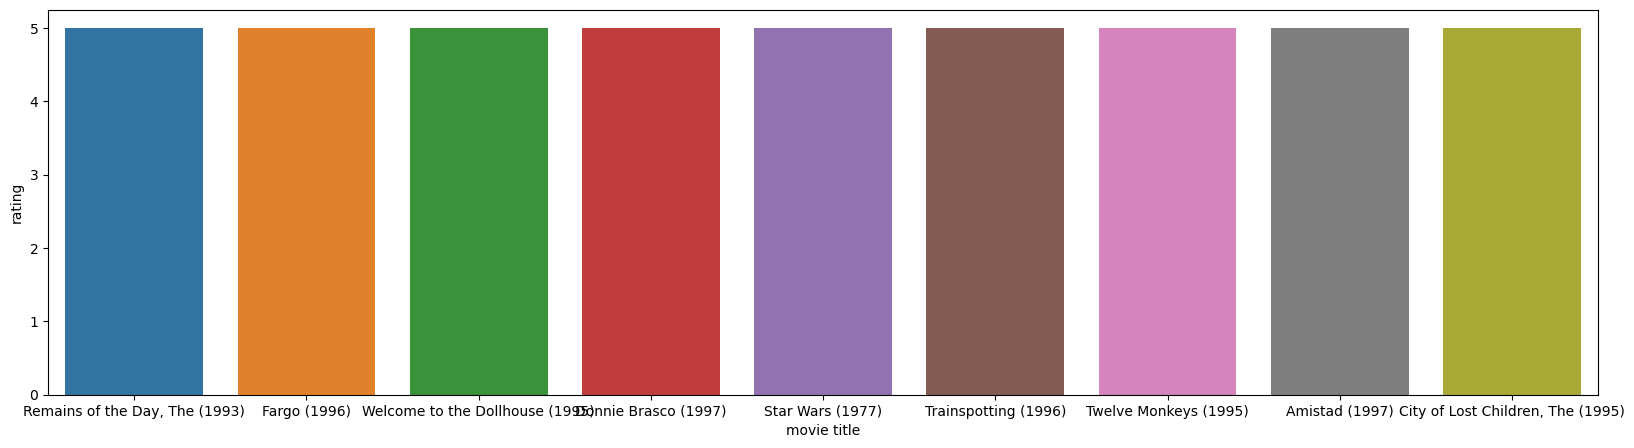

In [39]:
plt.figure(figsize=(20,5))
sns.barplot(x="movie title", y="rating", data=df_max_rating)
plt.show()

***In the above code we get the top 10 movies that have the highest rating***

<font color=blue>***4. Visualize the distribution of rentals by day of the week or time of day. Are there any preferred rental times?***</font>

In [40]:
import datetime as dt
df_final["Days"]=df_final["release date"].dt.day_name()

In [41]:
df_final.sample(2)

,user_id,age,sex,occupation,zip_code,item_id,rating,timestamp,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Days
67500,617,27,F,writer,11201,1019,4,1970-01-01 00:00:00.883788782,"Die xue shuang xiong (Killer, The) (1989)",1989-01-01,http://us.imdb.com/M/title-exact?Die%20xue%20s...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Sunday
68691,627,24,M,engineer,08034,4,2,1970-01-01 00:00:00.879531248,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,Sunday


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


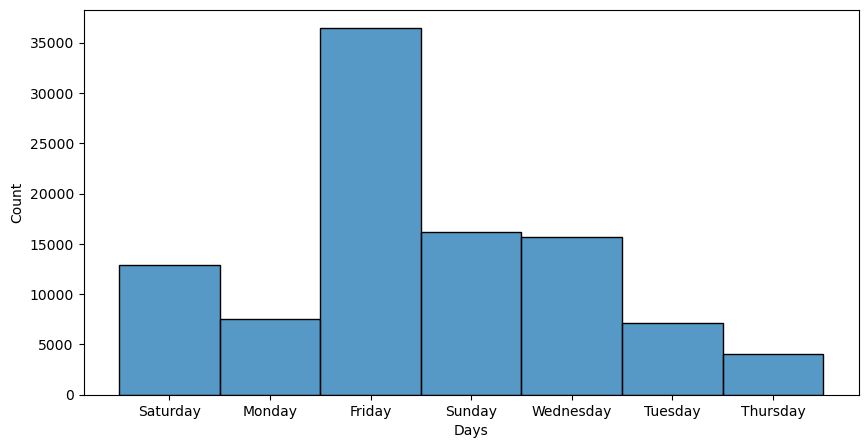

In [42]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_final["Days"], bins=5)
plt.show()

# Part-3: Data Summarization

<font color=blue>***1. Calculate basic descriptive statistics for the "rating" column (mean, median, standard deviation).***</font>


In [43]:
y = df_final["rating"].mean()
x = df_final["rating"].median()
l = df_final["rating"].std()

print("The mean value is {}\nThe median value is {}\nThe standard deviation is {}".format(y, x, l))

The mean value is 3.5298652986529864
The median value is 4.0
The standard deviation is 1.1256779805418657


<font color=blue>***2.  Summarize the number of unique users and movies in the dataset.***</font>

In [44]:
df_final["user_id"].nunique()
# Here we are taking the user_id to find the unique users because every user has the unique id attached to it.

943

In [45]:
df_final["movie title"].nunique()

1664

<font color=blue>***3. Find the most active users (top 10 or 20) based on the number of movie rentals.***</font>

In [46]:
x = df_final.groupby("occupation")["movie title"].count().sort_values(ascending=False).head(15).to_frame(name="Movie_count").reset_index()
x

,occupation,Movie_count
0,student,21957
1,other,10663
2,educator,9442
3,engineer,8175
4,programmer,7801
5,administrator,7479
6,writer,5535
7,librarian,5273
8,technician,3506
9,executive,3403


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


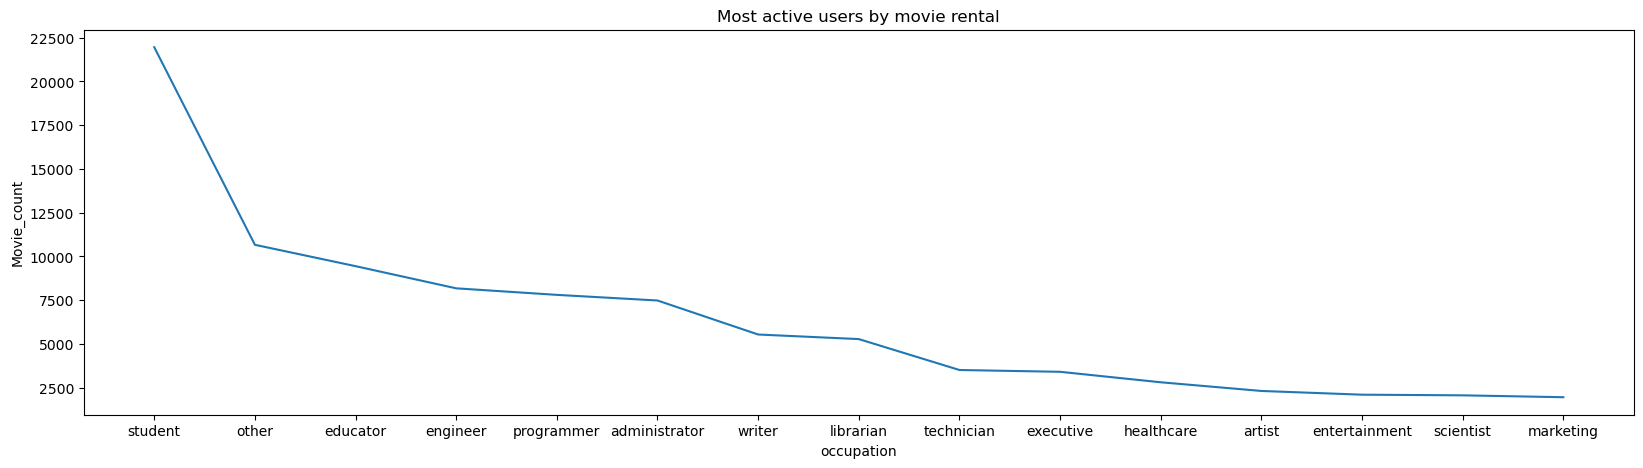

In [47]:
plt.figure(figsize=(20, 5))
sns.lineplot(x="occupation",y="Movie_count",data=x)
plt.title("Most active users by movie rental")
plt.show()

***In the above code, we have found the number of movie rentals by the usertype and we can see that the students have watched the maximum number of movies followed by others***

<font color=blue>***4. Identify the most popular genre(s) based on movie rentals or ratings***</font>

In [48]:
y = df_final.iloc[:, 11:24].sum().sort_values(ascending=False).reset_index(name="Count")
y

,index,Count
0,Drama,39895
1,Comedy,29831
2,Action,25589
3,Adventure,13753
4,Crime,8055
5,Children's,7182
6,Horror,5317
7,Musical,4954
8,Animation,3605
9,Film-Noir,1733


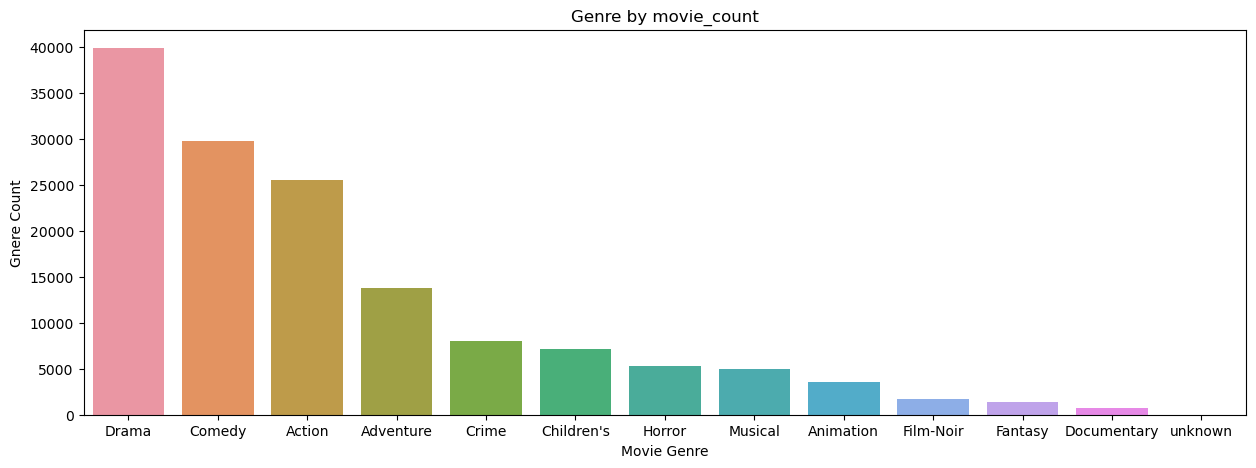

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x="index", y="Count", data=y)
plt.xlabel("Movie Genre")
plt.ylabel("Gnere Count")
plt.title("Genre by movie_count")
plt.show()

***From the above code, we can see that the most popular genre(s) are Drama, Comedy and the leat popular genre is documentary***

In [103]:
df_final.head(2)

,user_id,age,sex,occupation,zip_code,item_id,rating,timestamp,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Days
0,1,24,M,technician,85711,51,4,1970-01-01 00:00:00.878543275,Legends of the Fall (1994),1994-01-01,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,Saturday
1,1,24,M,technician,85711,265,4,1970-01-01 00:00:00.878542441,"Hunt for Red October, The (1990)",1990-01-01,http://us.imdb.com/M/title-exact?Hunt+for+Red+...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Monday


# <font color=blue>***Scatter-plot using plotly***</font>

In [104]:
import plotly.express as px
import pandas as pd


fig = px.scatter(df_final, x='occupation', y='rating', hover_data=['rating'])
fig.update_layout(title='Interactive Scatter Plot', xaxis_title='occupation', yaxis_title='rating')
fig.show()